# ✨Know your Gender Bias in Music!✨

A new reason why you are a terrible feminist 🤷🏽‍♀️

But first, a little encounter with Spotipy to see the top songs of your favorite band (hopefully, a woman's band) 

In [6]:
import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials



In [7]:
from dotenv import load_dotenv
load_dotenv()
import os

In [8]:
!touch .env
!pip install python-dotenv
client_id='os.getenv("client_id")',
client_secret='os.getenv("client_secret")'

In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

API_KEY = os.getenv('PROJECT_API_KEY')

In [6]:
spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id,
    client_secret,
))

In [7]:
results = spotify.search(q='artist:Jungle', type='artist') 

TypeError: can only concatenate tuple (not "str") to tuple

In [25]:
results['artists']['items'][0]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/59oA5WbbQvomJz2BuRG071'},
 'followers': {'href': None, 'total': 1142268},
 'genres': ['indie soul', 'indietronica', 'uk contemporary r&b'],
 'href': 'https://api.spotify.com/v1/artists/59oA5WbbQvomJz2BuRG071',
 'id': '59oA5WbbQvomJz2BuRG071',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb15cf3de5c20aa0bec068b840',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab6761610000517415cf3de5c20aa0bec068b840',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f17815cf3de5c20aa0bec068b840',
   'width': 160}],
 'name': 'Jungle',
 'popularity': 71,
 'type': 'artist',
 'uri': 'spotify:artist:59oA5WbbQvomJz2BuRG071'}

In [26]:
lz_uri = 'spotify:artist:59oA5WbbQvomJz2BuRG071'

results = spotify.artist_top_tracks(lz_uri)

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    #print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])

track    : Back On 74
cover art: https://i.scdn.co/image/ab67616d0000b27377619f14cb03e11baf5761d1
track    : I've Been In Love
cover art: https://i.scdn.co/image/ab67616d0000b27377619f14cb03e11baf5761d1
track    : Candle Flame
cover art: https://i.scdn.co/image/ab67616d0000b27377619f14cb03e11baf5761d1
track    : Casio
cover art: https://i.scdn.co/image/ab67616d0000b2733960505e249b30cac0ce8d82
track    : Busy Earnin'
cover art: https://i.scdn.co/image/ab67616d0000b27344fee73b385fdcc0e07922f9
track    : Happy Man
cover art: https://i.scdn.co/image/ab67616d0000b2733960505e249b30cac0ce8d82
track    : Keep Moving
cover art: https://i.scdn.co/image/ab67616d0000b27374cecbbd6d0b6db5fdcca49d
track    : Dominoes
cover art: https://i.scdn.co/image/ab67616d0000b27377619f14cb03e11baf5761d1
track    : All Of The Time
cover art: https://i.scdn.co/image/ab67616d0000b27374cecbbd6d0b6db5fdcca49d
track    : Problemz
cover art: https://i.scdn.co/image/ab67616d0000b27377619f14cb03e11baf5761d1


In [27]:
from playwright.async_api import async_playwright

In [30]:
playwright = await async_playwright().start()
browser = await playwright.chromium.launch(headless = False)
page = await browser.new_page()

In [31]:
await page.goto('https://open.spotify.com/artist/59oA5WbbQvomJz2BuRG071')

<Response url='https://open.spotify.com/intl-es/artist/59oA5WbbQvomJz2BuRG071' request=<Request url='https://open.spotify.com/intl-es/artist/59oA5WbbQvomJz2BuRG071' method='GET'>>

In [32]:
from bs4 import BeautifulSoup

doc = BeautifulSoup(await page.content())

### How to scrape the info we need 

In [33]:
top_songs = doc.find_all("div", role="row")

### How to find the name of the song on the Spotify website:

In [34]:
top_songs[0].div.find_all('div')[4].text

'Back On 74'

### How many times that song was played:

In [35]:
top_songs[0].div.find_all('div')[5].text

'66,167,084'

### Now, let's see the top 5:

In [36]:
for song in top_songs:
    title = song.div.find_all('div')[4].text
    play_count = song.div.find_all('div')[5].text
    print(title, play_count)

Back On 74 66,167,084
I've Been In Love 24,335,859
Candle Flame 30,890,429
Casio 114,459,753
Busy Earnin' 145,924,039


### Let's save this as a beautiful CSV

In [37]:
import pandas as pd

In [38]:
top_songs = doc.find_all("div", role="row")

songs_data = []

for song in top_songs:
    title = song.div.find_all('div')[4].text
    play_count = song.div.find_all('div')[5].text
    
   
    song_info = {'Title': title, 'PlayCount': play_count}
    
    
    songs_data.append(song_info)


In [39]:
df = pd.DataFrame(songs_data)

df.to_csv('songs_data.csv', index=False)

In [21]:
df

,Title,PlayCount
0,Back On 74,"66,167,084"
1,I've Been In Love,"24,335,859"
2,Candle Flame,"30,890,429"
3,Casio,"114,459,753"
4,Busy Earnin',"145,924,039"


### NOW, the reason we are here, to see if Spotify is recommending you more male than female bands: 

First, you need to login with your API KEY from Spotify

In [40]:
from spotipy.oauth2 import SpotifyOAuth

scope='user-library-read'

oauth = SpotifyOAuth(
    client_id='d3e846e4009f4f388209d56b0691f69a',
    client_secret='60ec7a0f3050405e885f5d5c1b17cee8',
    redirect_uri='http://localhost/callback',
    scope=scope
)
sp = spotipy.Spotify(auth_manager=oauth)

In [23]:
sp.me()

Using `localhost` as redirect URI without a port. Specify a port (e.g. `localhost:8080`) to allow automatic retrieval of authentication code instead of having to copy and paste the URL your browser is redirected to.


Enter the URL you were redirected to:  http://localhost/callback?code=AQC8hjmtnshNWaqD5vSfDSke9e55hn9tyMZ_38Q5RmJVhYHlziE4b_uxAnaCDAKotDmsLUPtgnbKa6oViK5QV51xtCV_7eb2cvBQJ6U5QtIvdZ9XpLTEi-5s4531K4me9YosPwOvw-3f7EE7fr6rSSPUGuSRp-XudNI83rkhJEriW8V7USyN1TES-XWNKpzW


{'display_name': 'Carla Mandiola',
 'external_urls': {'spotify': 'https://open.spotify.com/user/12124601674'},
 'href': 'https://api.spotify.com/v1/users/12124601674',
 'id': '12124601674',
 'images': [],
 'type': 'user',
 'uri': 'spotify:user:12124601674',
 'followers': {'href': None, 'total': 101}}

Then, we look for the ID of the playlist you want to look. In this case, is my Discover Weekly playlist

In [24]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

In [43]:
scope='user-library-read'

oauth = SpotifyOAuth(
    client_id='d3e846e4009f4f388209d56b0691f69a',
    client_secret='60ec7a0f3050405e885f5d5c1b17cee8',
    redirect_uri='http://localhost/callback',
    scope=scope
)
sp = spotipy.Spotify(auth_manager=oauth)


PLAYLIST_URI = 'spotify:playlist:37i9dQZEVXcGsWD0rE22It'

results = sp.playlist_tracks(PLAYLIST_URI)
playlist_data = []

for idx, track in enumerate(results['items']):
    track_data = {
        'Track Name': track['track']['name'],
        'Artists': ', '.join([artist['name'] for artist in track['track']['artists']])
    }
    playlist_data.append(track_data)

playlist_df = pd.DataFrame(playlist_data)

playlist_df.to_csv('playlist_data.csv', index=False)


Using `localhost` as redirect URI without a port. Specify a port (e.g. `localhost:8080`) to allow automatic retrieval of authentication code instead of having to copy and paste the URL your browser is redirected to.


Enter the URL you were redirected to:  http://localhost/callback?code=AQBOzYRJcJ7PJywQRqLwgyzFyQKd8C4eh05PkMkBTa649M5rPkG0KiH80Tt-xkOBxhrbBIU-1Guqm5rHW0uskhUnXkY6W1jmPHi5sAR4YTxnE41zDHizpNOyeQ4mqIWf-BrPIPQscIQ8aV2dBOE9gZqi8oGOaXxhl0mPm9TOpd9tf4hNxA_OmXgKlE6FDLf3


A little SneakPeek

In [44]:
playlist_df.head()

,Track Name,Artists
0,Witches,Alice Phoebe Lou
1,Daydream In Blue,I Monster
2,Hey Lover,The Daughters Of Eve
3,Babydoll,Dominic Fike
4,Make Your Own Kind Of Music,Cass Elliot


In [50]:
gender_df = pd.read_csv('Gender1.csv')
gender_df.rename(columns={'name;pronoun;gender':'col'},inplace=True)
gender_df.head()

,name,gender,pronoun
0,NSYNC,male,they/them
1,*repeat repeat,NaN,they/them
2,*shels,NaN,they/them
3,#1 Garth Brooks Tribute Band,NaN,they/them
4,#366: A life lived,NaN,they/them


In [51]:
playlist_df.columns= ["track", "name"]

In [52]:
merge = playlist_df.merge(gender_df, how="left", on="name")

In [53]:
merge

,track,name,gender,pronoun
0,Witches,Alice Phoebe Lou,female,she/her
1,Daydream In Blue,I Monster,male,they/them
2,Hey Lover,The Daughters Of Eve,female,they/them
3,Babydoll,Dominic Fike,male,he/him
4,Make Your Own Kind Of Music,Cass Elliot,female,she/her
5,Talking In Your Sleep,The Romantics,male,they/them
6,Witchoo,"Durand Jones & The Indications, Durand Jones, ...",male,they/them
7,Rose Pink Cadillac,DOPE LEMON,male,he/him
8,Young Hearts Run Free,Candi Staton,female,she/her
9,You Are the Right One,Sports,mixed,they/them


And now a chart to make you feel worse

In [55]:
import matplotlib.pyplot as plt

<Axes: xlabel='gender'>

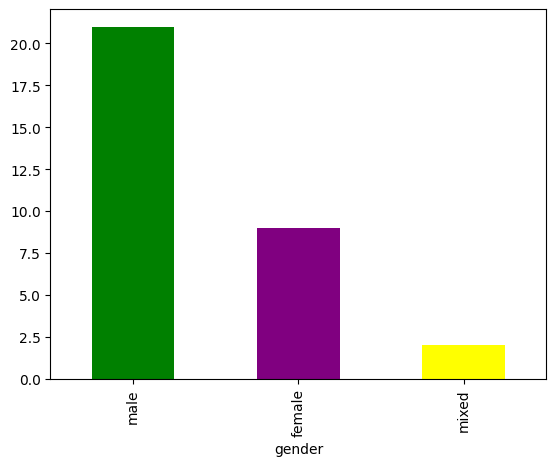

In [59]:
merge['gender'].fillna('not known').value_counts(dropna=False).plot(kind='bar', color=['green', 'purple', 'yellow','orange'])